In [56]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.utils import plot_model
from keras import backend as K
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras import layers
import datetime
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1,write_graph=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

!unzip /content/drive/MyDrive/chest_xray.zip

DATA PREPARATION


In [5]:
train_directory = '/content/chest_xray/train'
test_directory = '/content/chest_xray/test'

train_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,labels='inferred',label_mode='int', seed=3, validation_split=0.1, subset='training',
    image_size=(256,256),interpolation='bilinear',color_mode='grayscale')
    
validation_data = tf.keras.utils.image_dataset_from_directory(
    train_directory,labels='inferred',label_mode='int', seed=3, validation_split=0.1, subset='validation',
    image_size=(256,256),interpolation='bilinear',color_mode='grayscale')

test_data =  tf.keras.utils.image_dataset_from_directory(
    test_directory,labels='inferred',label_mode='int', seed=3,
    image_size=(256,256),interpolation='bilinear',color_mode='grayscale')

Found 5216 files belonging to 2 classes.
Using 4695 files for training.
Found 5216 files belonging to 2 classes.
Using 521 files for validation.
Found 624 files belonging to 2 classes.


optional data augmentation for section G

In [92]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

MODEL DEFINE 

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_30 (Sequential)  (None, 256, 256, 1)       0         
                                                                 
 rescale (Rescaling)         (None, 256, 256, 1)       0         
                                                                 
 conv1 (Conv2D)              (None, 254, 254, 32)      320       
                                                                 
 pool1 (MaxPooling2D)        (None, 127, 127, 32)      0         
                                                                 
 conv2 (Conv2D)              (None, 125, 125, 32)      9248      
                                                                 
 pool2 (MaxPooling2D)        (None, 62, 62, 32)        0         
                                                                 
 conv3 (Conv2D)              (None, 60, 60, 32)      

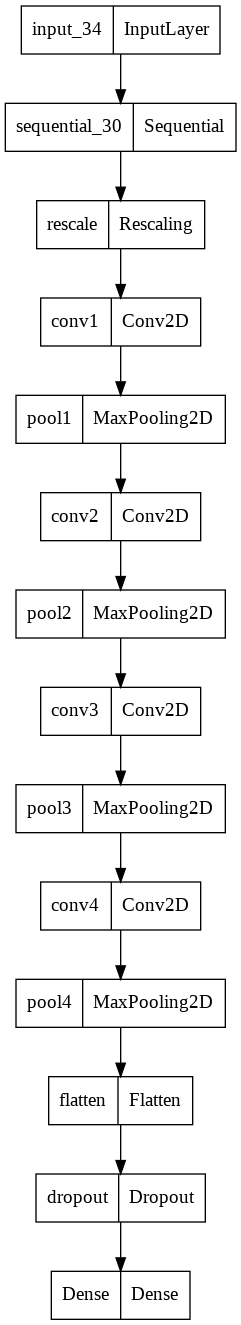

In [102]:
#hyperparamters
num_classes = 2
input_shape = (256, 256,1)
batch_size = 32
epochs = 
IMG_SIZE = 128
dropout=0.1
lr = 0.0001


model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
#model.add(layers.Resizing(IMG_SIZE, IMG_SIZE))
model.add(data_augmentation)
model.add(layers.Rescaling(1./255,name='rescale'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv1'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),name='pool1'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv2'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),name='pool2'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv3'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),name='pool3'))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu",name='conv4'))
model.add(layers.MaxPooling2D(pool_size=(2, 2),name='pool4'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dropout(dropout,name='dropout'))
model.add(layers.Dense(num_classes, activation="softmax",name='Dense'))

        
        #layers.Dense(4, activation='relu'),

        #layers.Dense(num_classes, activation="softmax"),

  
#print("Number of weights after calling the model:", len(model.weights))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
K.set_value(model.optimizer.learning_rate, lr)
#print("Learning rate :", model.optimizer.learning_rate.numpy())
model.summary()
plot_model(model)

MODEL TRAINING

In [101]:

history = model.fit(
    x=train_data, y=None,  epochs=epochs, verbose='auto',batch_size=None,
    callbacks=[tensorboard_callback], validation_split=0.0, validation_data=validation_data, shuffle=True,
    class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None,  validation_freq=1,validation_batch_size=None,
    max_queue_size=10, workers=1, use_multiprocessing=False,
    )

Epoch 1/20
147/147 [==============================] - 25s 157ms/step - loss: 3.7348 - accuracy: 0.7129 - val_loss: 0.6871 - val_accuracy: 0.7754
Epoch 2/20
 35/147 [======>.......................] - ETA: 16s - loss: 0.6877 - accuracy: 0.7241

KeyboardInterrupt: ignored

PLOTS

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


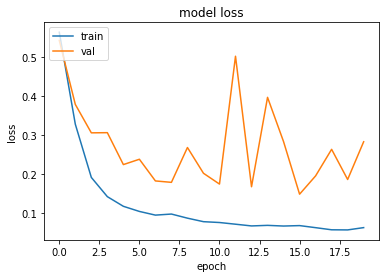

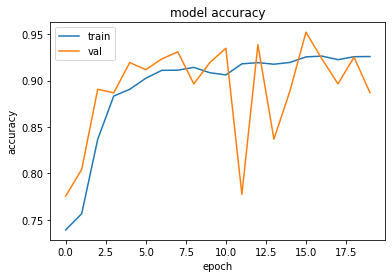

In [96]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

TEST MODEL

In [98]:
loss,score = model.evaluate(test_data)
print("Test loss:", loss)
print("Test accuracy:", score)
#y_pred=np.argmax(model.predict(test_data),axis=-1)
#a=confusion_matrix(,y_pred)

20/20 [==============================] - 3s 88ms/step - loss: 0.2629 - accuracy: 0.8942
Test loss: 0.2628517150878906
Test accuracy: 0.8942307829856873
